In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("housing.csv")

In [4]:
import numpy as np

In [25]:
def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_index = shuffled_indices[:test_set_size]
    train_index = shuffled_indices[test_set_size:]
    return data.iloc[test_index], data.iloc[train_index]

In [6]:
test , train = shuffle_and_split_data(df, 0.2)

In [8]:
test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
7027,-118.09,33.96,36.0,1116.0,229.0,719.0,233.0,3.4250,163200.0,<1H OCEAN
14063,-117.13,32.75,20.0,2271.0,602.0,992.0,520.0,2.2599,157600.0,NEAR OCEAN
20445,-118.83,34.33,6.0,6679.0,1164.0,3196.0,1157.0,5.4493,242600.0,<1H OCEAN
5694,-118.25,34.25,34.0,3150.0,518.0,1392.0,480.0,4.9355,336900.0,<1H OCEAN
15660,-122.42,37.78,26.0,812.0,507.0,628.0,445.0,2.3304,500001.0,NEAR BAY


In [9]:
df["income_category"] = pd.cut(df["median_income"], bins=[0, 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1, 2, 3, 4, 5])

In [10]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [11]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND,2


In [13]:
import matplotlib.pyplot as plt

<Axes: xlabel='income_category'>

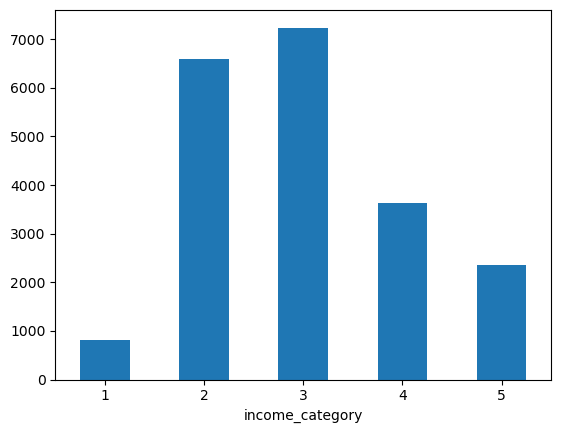

In [24]:
df["income_category"].value_counts().sort_index().plot.bar(rot=0, grid=False)

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit
 
# Assume income_cat is a column in the dataset created from median_income
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
 
for train_index, test_index in split.split(df, df["income_category"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

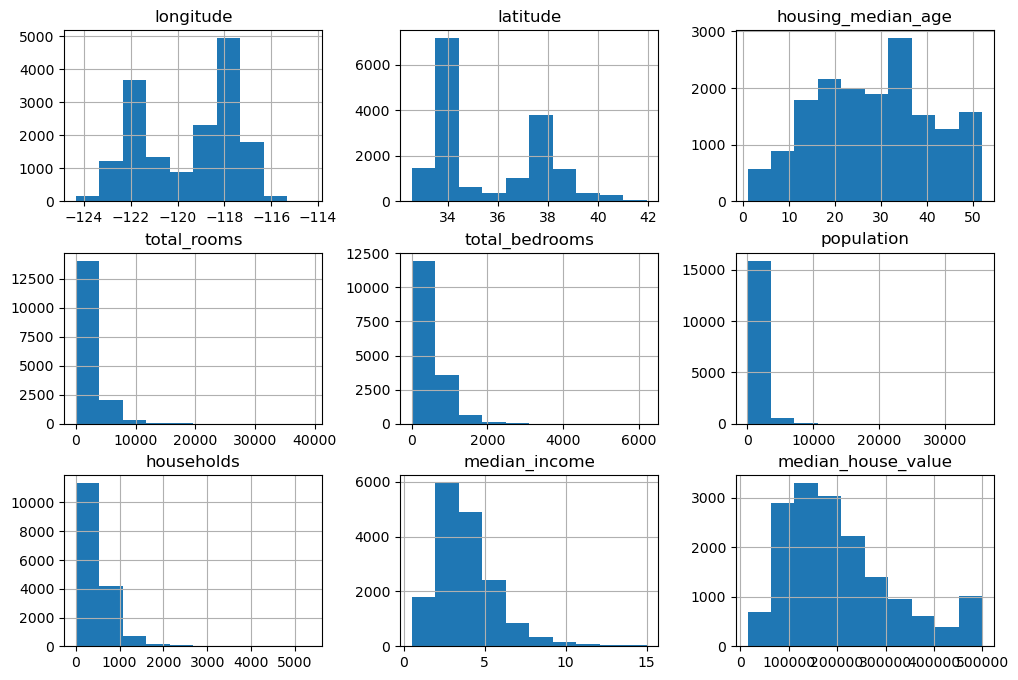

In [34]:
strat_train_set.hist(figsize=(12,8))